# Desarrollo Proyecto 7008, ViT [EXP 3]

Angelo Muñoz

# Readme:
Adjuntar estos archivo a "mi unidad" en su drive.

[datos.zip](https://drive.google.com/file/d/1TaQCJFK5sB1nfLM9eZuDllPdRayfAwJr/view?usp=sharing)

[archivos_txt](https://drive.google.com/file/d/19DDb9JtURg1UHICc-7EBd4KkVmJY39NQ/view?usp=sharing)

[df_test_clean](https://drive.google.com/file/d/1nJlicgCFtwr0PRPjzuFCPm6TK6JcxR1g/view?usp=drive_link)

[df_train_clean](https://drive.google.com/file/d/1kRofdUPHObkdMCeo0MRcJTKG9s0e5DDx/view?usp=sharing)


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Cargando la data:

In [ ]:
# Crear una carpeta llamada "dataset" en la ruta /content/
!mkdir -p /content/dataset/

# Descomprimir el archivo en la carpeta recién creada
!unzip /content/drive/MyDrive/Images.zip -d /content/dataset/

#creando carpeta para los txt
!mkdir -p /content/textos/
# Descomprimiendolos
!unzip /content/drive/MyDrive/Yoga-82.zip -d /content/textos/


Se han truncado las últimas 5000 líneas del flujo de salida.
 extracting: /content/dataset/Images/Supta_Virasana_Vajrasana/4_51.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_52.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_53.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_54.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_55.jpg  
 extracting: /content/dataset/Images/Supta_Virasana_Vajrasana/4_56.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_57.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_58.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_61.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_65.jpg  
 extracting: /content/dataset/Images/Supta_Virasana_Vajrasana/4_66.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4_67.jpg  
  inflating: /content/dataset/Images/Supta_Virasana_Vajrasana/4

## Imports

In [ ]:
pip install einops

In [ ]:
import sys
!git clone https://github.com/FrinyildV/EL7008_ViT_tf_ammc VIT_imp
sys.path.append("VIT_imp")


fatal: destination path 'VIT_imp' already exists and is not an empty directory.


In [ ]:
from VIT_imp.funciones.auxiliares import *
from VIT_imp.modelo.vit import *

In [ ]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

import pandas as pd


import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

from tqdm import tqdm, trange

import cv2

import torch
import torch.nn as nn
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
from torch.utils.data import DataLoader

from torchvision.transforms import ToTensor
from torchvision.datasets.mnist import MNIST

np.random.seed(0)
torch.manual_seed(0)



from torch import Tensor
from einops import rearrange , reduce, repeat
from einops.layers.torch import Rearrange, Reduce

from sklearn.model_selection import train_test_split

from sklearn import metrics as metsk
import matplotlib.pyplot as plt

from torchsummary import summary


## Código para limpiar los datos:

In [ ]:
# import pandas as pd

# headers=['ruta','clases_6','clases_20','clases_82']
# path_train = '/content/textos/Yoga-82/yoga_train.txt'
# df_train = pd.read_csv(path_train,sep=',',names=headers)

# path_test = '/content/textos/Yoga-82/yoga_test.txt'
# df_test = pd.read_csv(path_test,sep=',',names=headers)

In [ ]:
# img_mala=cv2.imread('/content/dataset/Images/'+"Akarna_Dhanurasana/84.jpg")
# # Calcular el histograma usando NumPy
# histograma = np.histogram(img_mala.flatten(), bins=256, range=[0,256])

# # Mostrar el histograma
# plt.bar(histograma[1][:-1], histograma[0], color='b', alpha=0.7)
# plt.title('Histograma de la imagen')
# plt.xlabel('Valor del píxel')
# plt.ylabel('Frecuencia')
# plt.show()

In [ ]:
# import cv2
# from tqdm import tqdm
# from google.colab.patches import cv2_imshow
# marcadas=[]
# for i,ruta in tqdm(enumerate(df_train['ruta'])):
#   img_path = '/content/dataset/Images/'+ruta
#   try:
#       img = cv2.imread(img_path)
#       # Verificar si la imagen se abrió con éxito y tiene dimensiones válidas
#       if img is not None and img.shape[0] > 0 and img.shape[1] > 0:
#           marcadas.append(0)
#       else: marcadas.append(1)
#           # print(f"Warning: No se pudo leer la imagen {img_path} o tiene dimensiones no válidas.")
#   except Exception as e:
#       print(f"Error al abrir la imagen {img_path}: {e}")
# df_train['marcadas']=marcadas

In [ ]:
# df_train[df_train['marcadas']==1]

In [ ]:
# marcadas=[]
# for i,ruta in tqdm(enumerate(df_test['ruta'])):
#   img_path = '/content/dataset/Images/'+ruta
#   try:
#       img = cv2.imread(img_path)
#       # Verificar si la imagen se abrió con éxito y tiene dimensiones válidas
#       if img is not None and img.shape[0] > 0 and img.shape[1] > 0:
#           marcadas.append(0)
#       else: marcadas.append(1)
#           # print(f"Warning: No se pudo leer la imagen {img_path} o tiene dimensiones no válidas.")
#   except Exception as e:
#       print(f"Error al abrir la imagen {img_path}: {e}")
# df_test['marcadas']=marcadas

In [ ]:
# df_test[df_test['marcadas']==0]

In [ ]:
# #filtrando
# df_train=df_train[df_train['marcadas']==0]
# df_test=df_test[df_test['marcadas']==0]

# df_train = df_train.drop('marcadas', axis=1)
# df_test = df_test.drop('marcadas', axis=1)

# # Guardar el DataFrame en un archivo CSV
# df_train.to_csv('/content/drive/MyDrive/df_train_clean.csv', index=False)
# df_test.to_csv('/content/drive/MyDrive/df_test_clean.csv', index=False)

## Data limpia:

In [ ]:

# headers=['ruta','clases_6','clases_20','clases_82']
path_clean_train = '/content/drive/MyDrive/df_train_clean.csv'
path_clean_test = '/content/drive/MyDrive/df_test_clean.csv'
df_train=pd.read_csv(path_clean_train)
df_test=pd.read_csv(path_clean_test)

# Entrenamiento:

### Extrayendo media y desv:

In [ ]:
# def online_mean_and_sd(loader):
#     """Compute the mean and sd in an online fashion

#         Var[x] = E[X^2] - E^2[X]
#     """
#     cnt = 0
#     fst_moment = torch.empty(3)
#     snd_moment = torch.empty(3)

#     for images, _ in loader:
#         b, c, h, w = images.shape
#         nb_pixels = b * h * w
#         sum_ = torch.sum(images, dim=[0, 2, 3])
#         sum_of_square = torch.sum(images ** 2, dim=[0, 2, 3])
#         fst_moment = (cnt * fst_moment + sum_) / (cnt + nb_pixels)
#         snd_moment = (cnt * snd_moment + sum_of_square) / (cnt + nb_pixels)

#         cnt += nb_pixels

#     return fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)



# resize_dim=(224,224)
# batch_size_train=32
# # Transformaciones para calcular las medias y las desv
# trans_metricas = transforms.Compose([
#     transforms.ToPILImage(), #<- necesario para usar resize
#     transforms.ToTensor(),
#     transforms.Resize(resize_dim)

# ])


# path_ruta_images = '/content/dataset/Images/'
# # dataset_train_metrics = Lector(ind0_train, ind1_train, folders, labels, transform=trans_metricas)
# dataset_train_metrics = Lector(data=df_train, modo=6, ruta_images=path_ruta_images, transform=trans_metricas)

# train_loader = DataLoader(dataset_train_metrics, batch_size_train,
#                           shuffle = True, num_workers = 2, pin_memory = True)

# # data_mean, data_std =online_mean_and_sd(train_loader)
# mean_train,std_train=online_mean_and_sd(train_loader)

---------

## dataloaders

In [ ]:
# metricas para 240x240
# mean_train=torch.tensor([0.6264, 0.6526, 0.6734])
# std_train = torch.tensor([0.3382, 0.3224, 0.3226])


In [ ]:
# metricas para 224 x 224
mean_train = torch.tensor([0.6265, 0.6526, 0.6734])
std_train = torch.tensor([0.3381, 0.3223, 0.3225])

In [ ]:
#%%%%%%% creando conjunto de validación: %%%%%%%%%

# df_train es tu DataFrame
X = df_train['ruta']
y = df_train['clases_82']

# Divide los datos en conjuntos de entrenamiento y validación con estratificación
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

df_val = df_train.iloc[X_val.index]
df_train = df_train.iloc[X_train.index]
#%%%%%%%%%%%%%%%%%

resize_dim=(224,224)
clases=6
path_ruta_images = '/content/dataset/Images/'

# Transformaciones que deseas aplicar a tus datos
transform_train = transforms.Compose([
    # transforms.ToPILImage(),
    transforms.ToTensor(),  # Convierte la imagen a un tensor
    transforms.Resize(resize_dim),
    transforms.Normalize(mean_train, std_train),
    transforms.RandomHorizontalFlip(0.5),
])
transform_val_test = transforms.Compose([
    # transforms.ToPILImage(),
    transforms.ToTensor(),  # Convierte la imagen a un tensor
    transforms.Resize(resize_dim),
    transforms.Normalize(mean_train, std_train),
])

# Crear una instancia de la clase Lector con los datos cargados

dataset_train = Lector(data=df_train, modo=clases, ruta_images=path_ruta_images, transform=transform_train)
dataset_val = Lector(data=df_val, modo=clases, ruta_images=path_ruta_images, transform=transform_val_test)
dataset_test = Lector(data=df_test, modo=clases, ruta_images=path_ruta_images, transform=transform_val_test)
# Crear un DataLoader para el conjunto de entrenamiento
batch_size_n = 32  # ajusta según sea necesario #800
train_loader  = DataLoader(dataset_train, batch_size=batch_size_n, shuffle=True)
val_loader = DataLoader(dataset_val, batch_size=batch_size_n, shuffle=False)
test_loader = DataLoader(dataset_test, batch_size=batch_size_n, shuffle=False)


## Train

Using device:  cuda (Tesla T4)


Epoch 1 in training:   0%|          | 0/376 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(

Epoch 1 in training: 100%|██████████| 376/376 [11:43<00:00,  2.18s/it]
                                                                      

Train accuracy: 28.11%
Epoch 1/5 loss: 1.72



Training:  20%|██        | 1/5 [14:22<57:30, 862.52s/it]

Val loss: 1.62
Val accuracy: 34.44%



Epoch 2 in training: 100%|██████████| 376/376 [11:22<00:00,  1.86s/it]
                                                                      

Train accuracy: 36.30%
Epoch 2/5 loss: 1.59



Training:  40%|████      | 2/5 [28:28<42:37, 852.53s/it]

Val loss: 1.57
Val accuracy: 38.30%



Epoch 3 in training: 100%|██████████| 376/376 [11:28<00:00,  2.11s/it]
                                                                      

Train accuracy: 39.24%
Epoch 3/5 loss: 1.54



Training:  60%|██████    | 3/5 [42:37<28:22, 851.11s/it]

Val loss: 1.52
Val accuracy: 39.66%



Epoch 4 in training: 100%|██████████| 376/376 [11:30<00:00,  2.20s/it]
                                                                      

Train accuracy: 42.56%
Epoch 4/5 loss: 1.48



Training:  80%|████████  | 4/5 [56:46<14:10, 850.46s/it]

Val loss: 1.49
Val accuracy: 40.43%



Epoch 5 in training: 100%|██████████| 376/376 [11:31<00:00,  1.57s/it]
                                                                      

Train accuracy: 45.15%
Epoch 5/5 loss: 1.42



Training: 100%|██████████| 5/5 [1:10:57<00:00, 851.42s/it]


Val loss: 1.42
Val accuracy: 44.85%


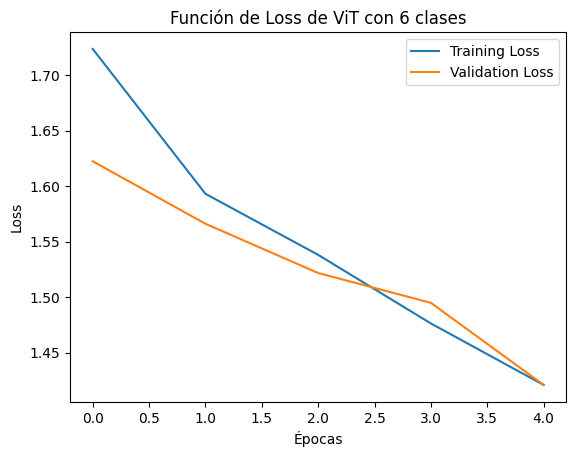

In [ ]:

# Defining model and training options
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device: ", device, f"({torch.cuda.get_device_name(device)})" if torch.cuda.is_available() else "")


model = ViT((3, 224, 224), n_patches=14, n_blocks=12, \
              hidden_d=768, n_heads=12, out_d=clases).to(device)     #hidden_d =768



N_EPOCHS = 5 #5
LR = 0.00005 #0.005

# Training loop
optimizer = Adam(model.parameters(), lr=LR)
criterion = CrossEntropyLoss()

ruta_modelo_inicial = '/content/drive/MyDrive/exp_3_chk_6.pth'
ruta_opt_inicial = '/content/drive/MyDrive/exp_3_optimizer_6.pth'
titulo_grafico = f'Función de Loss de ViT con {clases} clases'

train_funcion(red=model,criterio=criterion,optimizador=optimizer,ruta_guardado_red=ruta_modelo_inicial,
              ruta_guardado_optimizer=ruta_opt_inicial, dataloader_train = train_loader,
              dataloader_val = val_loader ,titulo_grafico_loss = titulo_grafico,
              n_epoch = N_EPOCHS )


In [ ]:
import os
#%%%%%%%%% listas con labels:
base_folder = '/content/dataset/Images/'
label_names_82 = os.listdir(base_folder)
label_names_82.remove('.DS_Store')

label_names_6 = ['standing', 'sitting', 'balancing', 'inverted', 'reclining', 'wheel']
label_names_20= [
    'standing_straight', 'standing_forward bend', 'standing_side bend', 'standing_others',
    'sitting_normal1', 'sitting_normal2', 'sitting_split', 'sitting_forward bend', 'sitting_twist',
    'balancing_front', 'balancing_side', 'inverted_legs straight up', 'inverted_legs bend',
    'reclining_up-facing', 'reclining_down-facing', 'reclining_side-facing', 'reclining_plank balance',
    'wheel_up-facing', 'wheel_down-facing', 'wheel_others'
]



## Evaluación train

Metricas modelo : Exp 3, 6 clases, Conjunto de Train
              precision    recall  f1-score   support

   balancing     0.2872    0.0995    0.1478       814
    inverted     0.4522    0.1737    0.2510      1088
   reclining     0.5540    0.5164    0.5345      2653
     sitting     0.5321    0.4762    0.5026      2642
    standing     0.4783    0.7836    0.5940      3299
       wheel     0.3394    0.2409    0.2818      1536

    accuracy                         0.4865     12032
   macro avg     0.4405    0.3817    0.3853     12032
weighted avg     0.4738    0.4865    0.4598     12032



/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Metricas modelo : Exp 3, 6 clases, Conjunto de Val
              precision    recall  f1-score   support

   balancing     0.1639    0.0493    0.0758       203
    inverted     0.4253    0.1355    0.2056       273
   reclining     0.5304    0.4607    0.4931       662
     sitting     0.4813    0.4478    0.4639       661
    standing     0.4473    0.7545    0.5617       827
       wheel     0.2982    0.2147    0.2496       382

    accuracy                         0.4501      3008
   macro avg     0.3911    0.3438    0.3416      3008
weighted avg     0.4330    0.4501    0.4204      3008



/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Metricas modelo : Exp 3, 6 clases, Conjunto de Test
              precision    recall  f1-score   support

   balancing     0.2294    0.0667    0.1033       375
    inverted     0.3989    0.1514    0.2195       469
   reclining     0.5122    0.4653    0.4876      1124
     sitting     0.4914    0.4645    0.4776      1113
    standing     0.4473    0.7389    0.5573      1402
       wheel     0.3045    0.2149    0.2520       656

    accuracy                         0.4501      5139
   macro avg     0.3973    0.3503    0.3496      5139
weighted avg     0.4325    0.4501    0.4219      5139



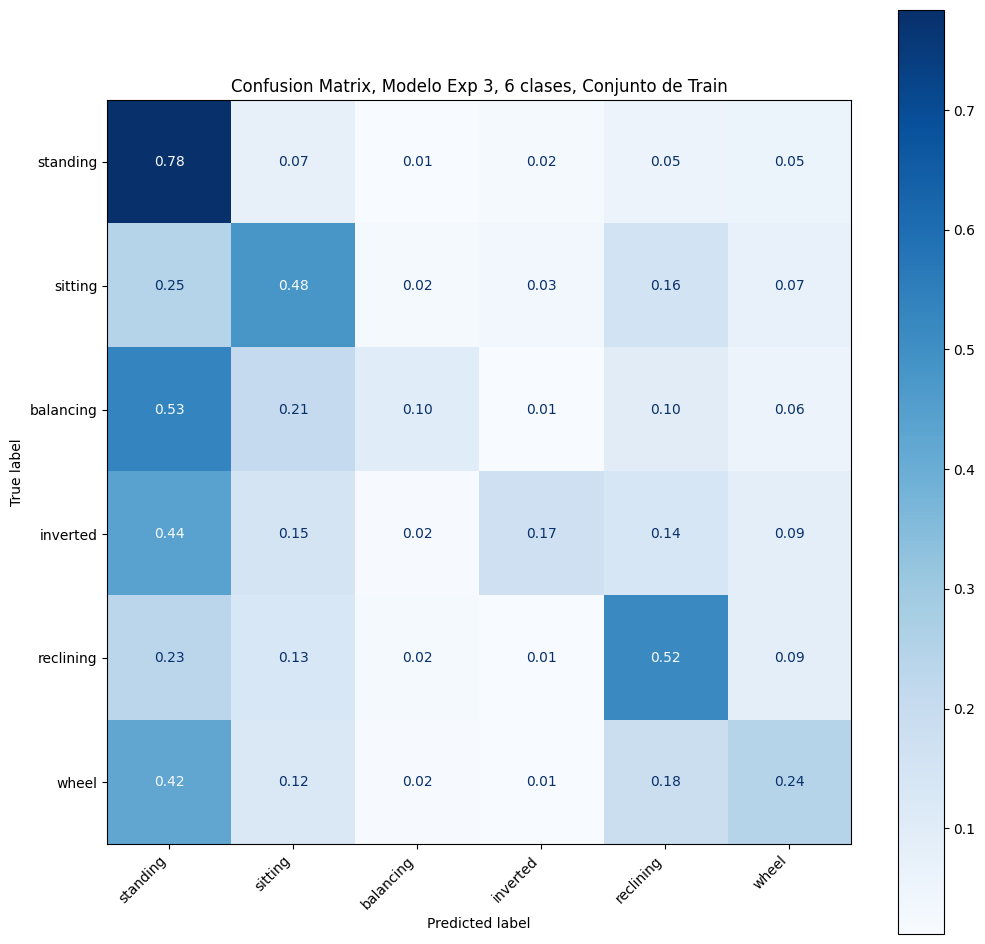

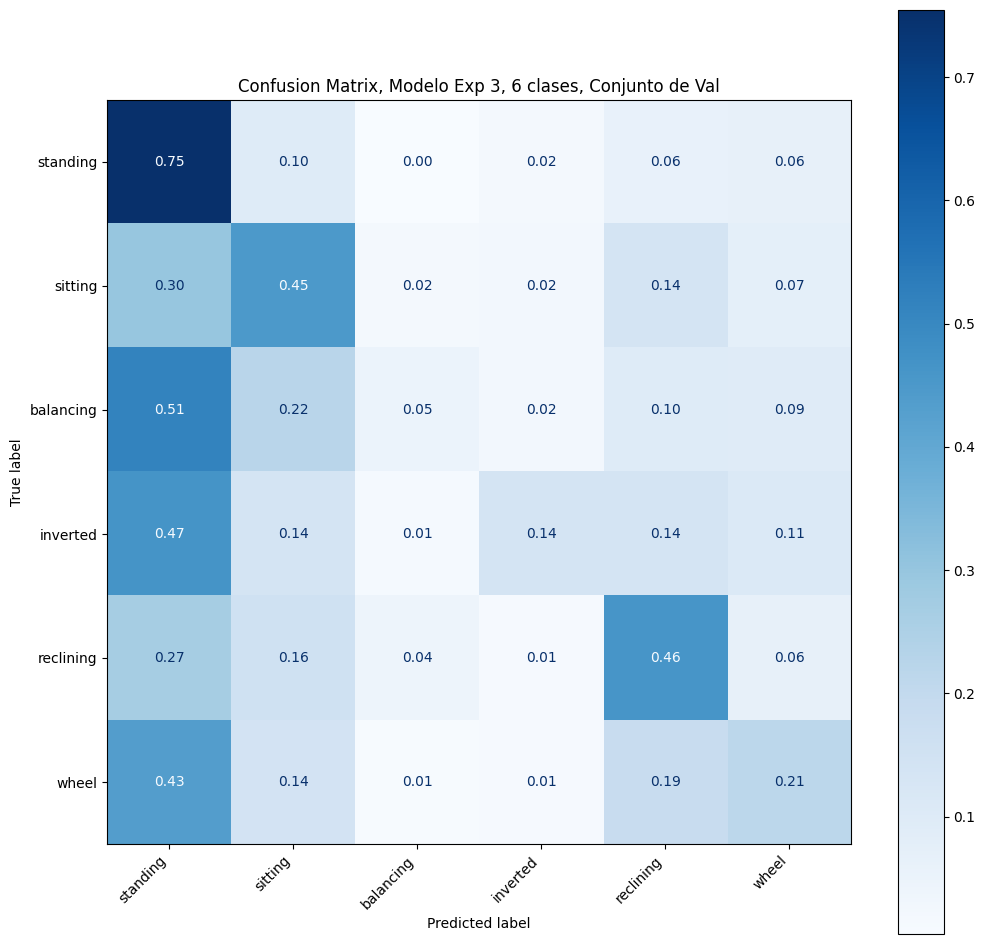

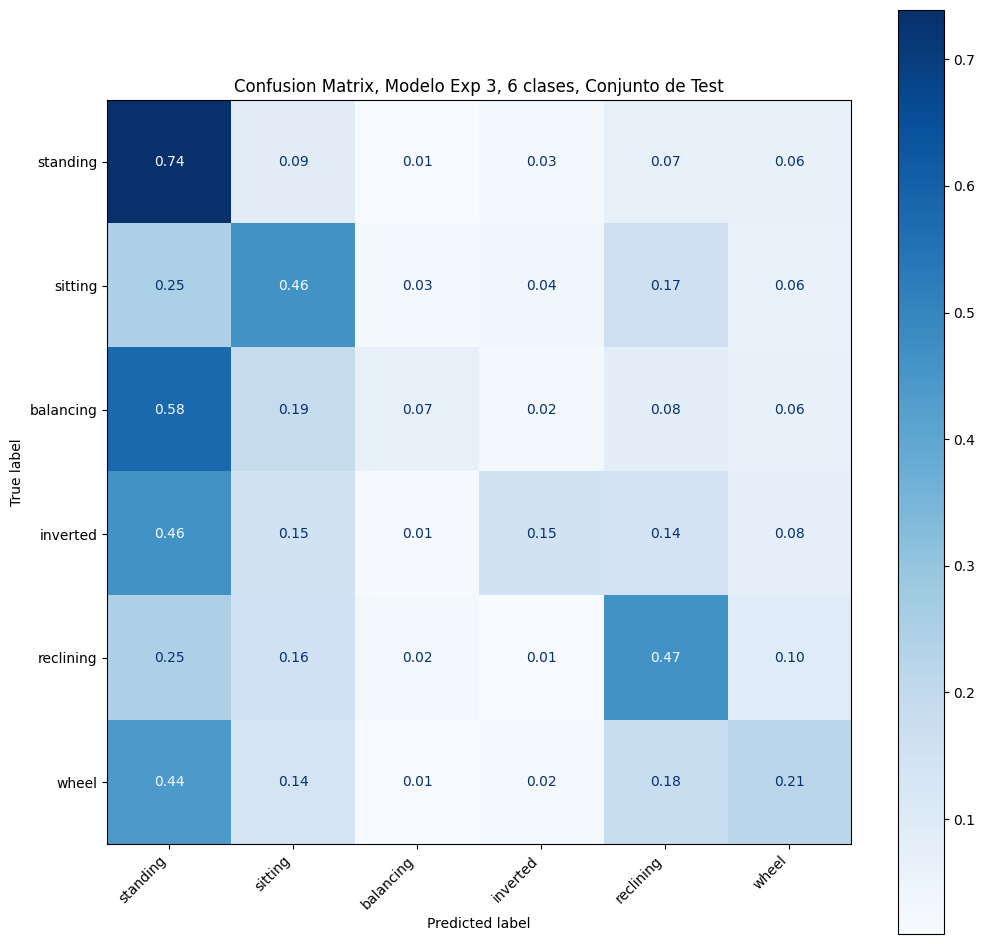

In [ ]:
ruta_eval = ruta_modelo_inicial

lista_dataloaders = [train_loader,val_loader,test_loader]
graficar_metricas(list_dat=lista_dataloaders, ruta_mod=ruta_eval,
                  nombre_modelo='Exp 3, 6 clases',lista_clases=label_names_6)

## TF 6-20

In [ ]:
# del model_tf

In [ ]:
clases_orig=clases #6
model_tf = ViT((3, 224, 224), n_patches=14, n_blocks=12, \
              hidden_d=768, n_heads=12, out_d=clases_orig)
network_state_dict = torch.load(ruta_modelo_inicial)
model_tf.load_state_dict(network_state_dict)
model_tf = model_tf.to(device)
optimizer_tf =Adam(model_tf.parameters(), lr=LR)
optimizer_state_dict=torch.load(ruta_opt_inicial)
optimizer_tf.load_state_dict(optimizer_state_dict)

In [ ]:
clases_tf=20
model_tf.mlp[2]= nn.Linear(768, clases_tf)
model_tf = model_tf.to(device)

congelando:

In [ ]:
# # Congela todas las capas del modelo
# for param in model_tf.parameters():
#     param.requires_grad = False

# # Habilita el gradiente para los parámetros de la nueva capa
# for param in model_tf.mlp[2].parameters():
#     param.requires_grad = True

In [ ]:
summary(model_tf,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1             [-1, 196, 768]         590,592
         LayerNorm-2             [-1, 197, 768]           1,536
            Linear-3             [-1, 197, 768]         590,592
            Linear-4             [-1, 197, 768]         590,592
            Linear-5             [-1, 197, 768]         590,592
           Dropout-6         [-1, 12, 197, 197]               0
            Linear-7             [-1, 197, 768]         590,592
MultiHeadAttention-8             [-1, 197, 768]               0
           Dropout-9             [-1, 197, 768]               0
      ResidualAdd-10             [-1, 197, 768]               0
        LayerNorm-11             [-1, 197, 768]           1,536
           Linear-12            [-1, 197, 3072]       2,362,368
             GELU-13            [-1, 197, 3072]               0
          Dropout-14            [-1, 19

In [ ]:

clases=clases_tf
# Crear una instancia de la clase Lector con los datos cargados

dataset_train = Lector(data=df_train, modo=clases, ruta_images=path_ruta_images, transform=transform_train)
dataset_val = Lector(data=df_val, modo=clases, ruta_images=path_ruta_images, transform=transform_val_test)
dataset_test = Lector(data=df_test, modo=clases, ruta_images=path_ruta_images, transform=transform_val_test)
# Crear un DataLoader para el conjunto de entrenamiento
batch_size_n = 32  # ajusta según sea necesario #800
train_loader  = DataLoader(dataset_train, batch_size=batch_size_n, shuffle=True)
val_loader = DataLoader(dataset_val, batch_size=batch_size_n, shuffle=False)
test_loader = DataLoader(dataset_test, batch_size=batch_size_n, shuffle=False)

### Evaluación TF 6-20

Epoch 1 in training:   0%|          | 0/376 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(

Epoch 1 in training: 100%|██████████| 376/376 [11:15<00:00,  1.84s/it]
                                                                      

Train accuracy: 20.97%
Epoch 1/5 loss: 2.58



Training:  20%|██        | 1/5 [13:52<55:31, 832.89s/it]

Val loss: 2.56
Val accuracy: 21.44%



Epoch 2 in training: 100%|██████████| 376/376 [11:17<00:00,  1.71s/it]
                                                                      

Train accuracy: 24.89%
Epoch 2/5 loss: 2.41



Training:  40%|████      | 2/5 [27:47<41:42, 834.08s/it]

Val loss: 2.43
Val accuracy: 24.47%



Epoch 3 in training: 100%|██████████| 376/376 [11:22<00:00,  1.62s/it]
                                                                      

Train accuracy: 28.38%
Epoch 3/5 loss: 2.31



Training:  60%|██████    | 3/5 [41:45<27:51, 835.82s/it]

Val loss: 2.41
Val accuracy: 26.53%



Epoch 4 in training: 100%|██████████| 376/376 [11:19<00:00,  1.86s/it]
                                                                      

Train accuracy: 31.32%
Epoch 4/5 loss: 2.21



Training:  80%|████████  | 4/5 [55:43<13:56, 836.63s/it]

Val loss: 2.34
Val accuracy: 27.16%



Epoch 5 in training: 100%|██████████| 376/376 [11:17<00:00,  1.51s/it]
                                                                      

Train accuracy: 33.96%
Epoch 5/5 loss: 2.13



Training: 100%|██████████| 5/5 [1:09:38<00:00, 835.79s/it]


Val loss: 2.30
Val accuracy: 28.99%


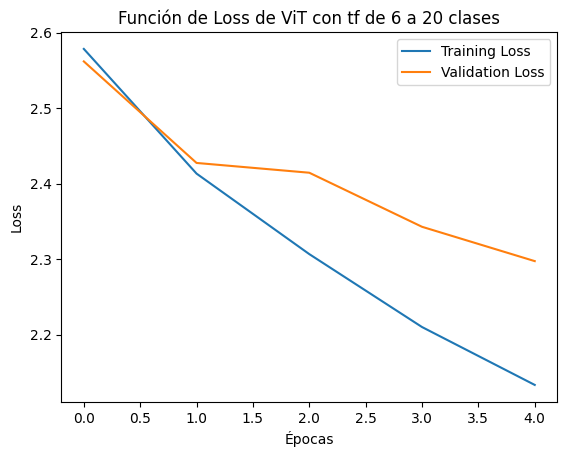

In [ ]:
loss_train_history=[]
loss_val_history=[]
# Training loop
optimizer = optimizer_tf
criterion = CrossEntropyLoss()


ruta_modelo_tf = '/content/drive/MyDrive/exp_3_chk_6_tf_20.pth'
ruta_opt_tf = '/content/drive/MyDrive/exp_3_optimizer_6_tf_20.pth'
titulo_grafico = f'Función de Loss de ViT con tf de {clases_orig} a {clases_tf} clases'

train_funcion(red=model_tf,criterio=criterion,optimizador=optimizer,ruta_guardado_red=ruta_modelo_tf,
              ruta_guardado_optimizer=ruta_opt_tf, dataloader_train = train_loader,
              dataloader_val = val_loader ,titulo_grafico_loss = titulo_grafico,
              n_epoch = N_EPOCHS )


Metricas modelo : Exp 3 TF, 6 a 20 clases, Conjunto de Train
                           precision    recall  f1-score   support

          balancing_front     0.3251    0.3346    0.3298       511
           balancing_side     0.2979    0.0924    0.1411       303
       inverted_legs bend     0.5167    0.0899    0.1531       345
inverted_legs straight up     0.2736    0.7416    0.3997       743
    reclining_down-facing     0.4422    0.2899    0.3502       990
  reclining_plank balance     0.3706    0.1797    0.2420       295
    reclining_side-facing     0.3196    0.1366    0.1914       227
      reclining_up-facing     0.3863    0.5153    0.4416      1141
     sitting_forward bend     0.4327    0.2415    0.3100       559
          sitting_normal1     0.3512    0.4153    0.3805       838
          sitting_normal2     0.4579    0.1522    0.2284       644
            sitting_split     0.3911    0.2357    0.2941       297
            sitting_twist     0.2732    0.1743    0.2129       304


/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Metricas modelo : Exp 3 TF, 6 a 20 clases, Conjunto de Val
                           precision    recall  f1-score   support

          balancing_front     0.1645    0.1953    0.1786       128
           balancing_side     0.1111    0.0267    0.0430        75
       inverted_legs bend     0.5000    0.0230    0.0440        87
inverted_legs straight up     0.2490    0.6452    0.3593       186
    reclining_down-facing     0.3451    0.1976    0.2513       248
  reclining_plank balance     0.3158    0.1644    0.2162        73
    reclining_side-facing     0.2174    0.0877    0.1250        57
      reclining_up-facing     0.3123    0.4366    0.3642       284
     sitting_forward bend     0.3133    0.1857    0.2332       140
          sitting_normal1     0.2870    0.3033    0.2949       211
          sitting_normal2     0.3898    0.1437    0.2100       160
            sitting_split     0.3208    0.2267    0.2656        75
            sitting_twist     0.1667    0.1200    0.1395        75
  

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Metricas modelo : Exp 3 TF, 6 a 20 clases, Conjunto de Test
                           precision    recall  f1-score   support

          balancing_front     0.2658    0.2511    0.2582       235
           balancing_side     0.3158    0.0857    0.1348       140
       inverted_legs bend     0.1333    0.0139    0.0252       144
inverted_legs straight up     0.2565    0.6338    0.3652       325
    reclining_down-facing     0.4837    0.2447    0.3250       425
  reclining_plank balance     0.4483    0.2080    0.2842       125
    reclining_side-facing     0.2500    0.1222    0.1642        90
      reclining_up-facing     0.3218    0.4607    0.3789       484
     sitting_forward bend     0.3019    0.1912    0.2341       251
          sitting_normal1     0.2298    0.2750    0.2504       320
          sitting_normal2     0.4261    0.1756    0.2487       279
            sitting_split     0.2800    0.1500    0.1953       140
            sitting_twist     0.2464    0.1382    0.1771       123
 

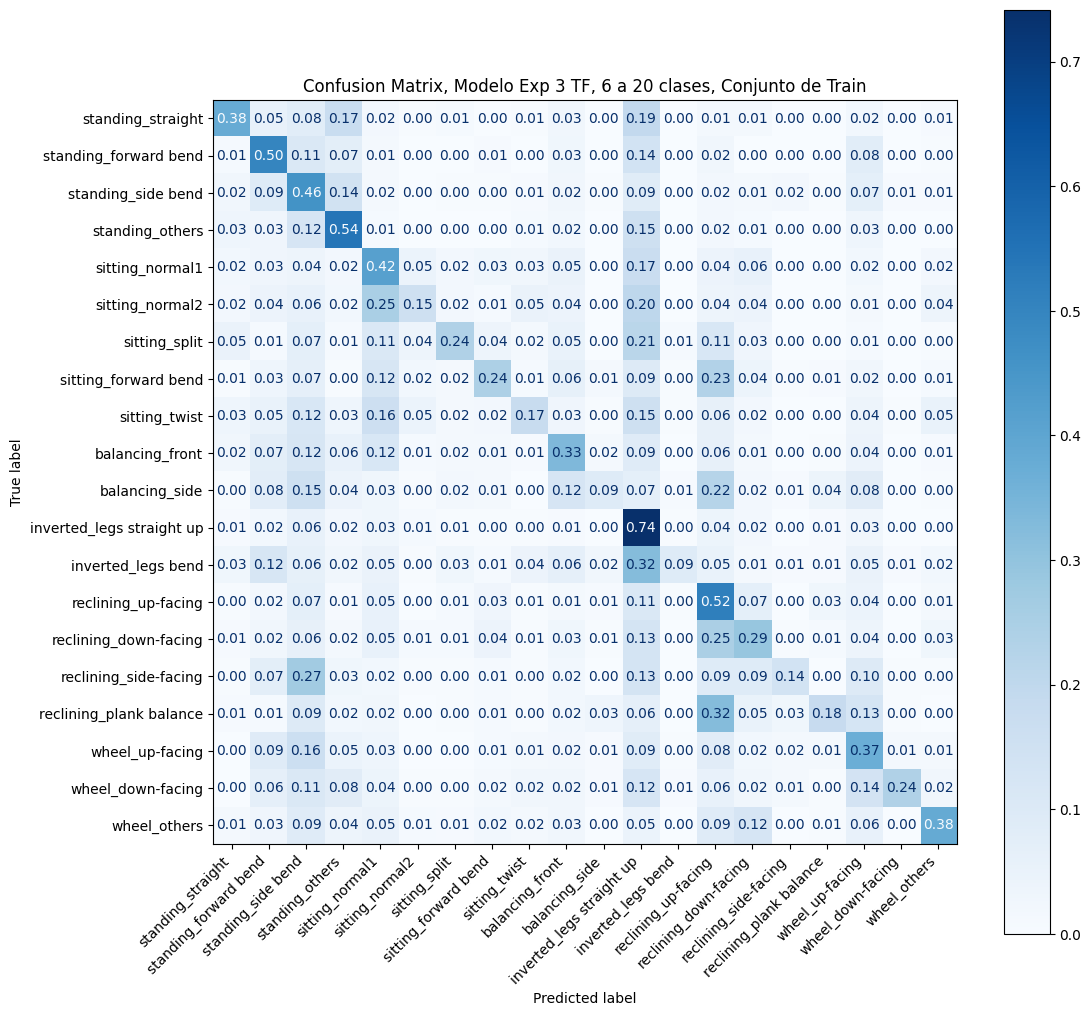

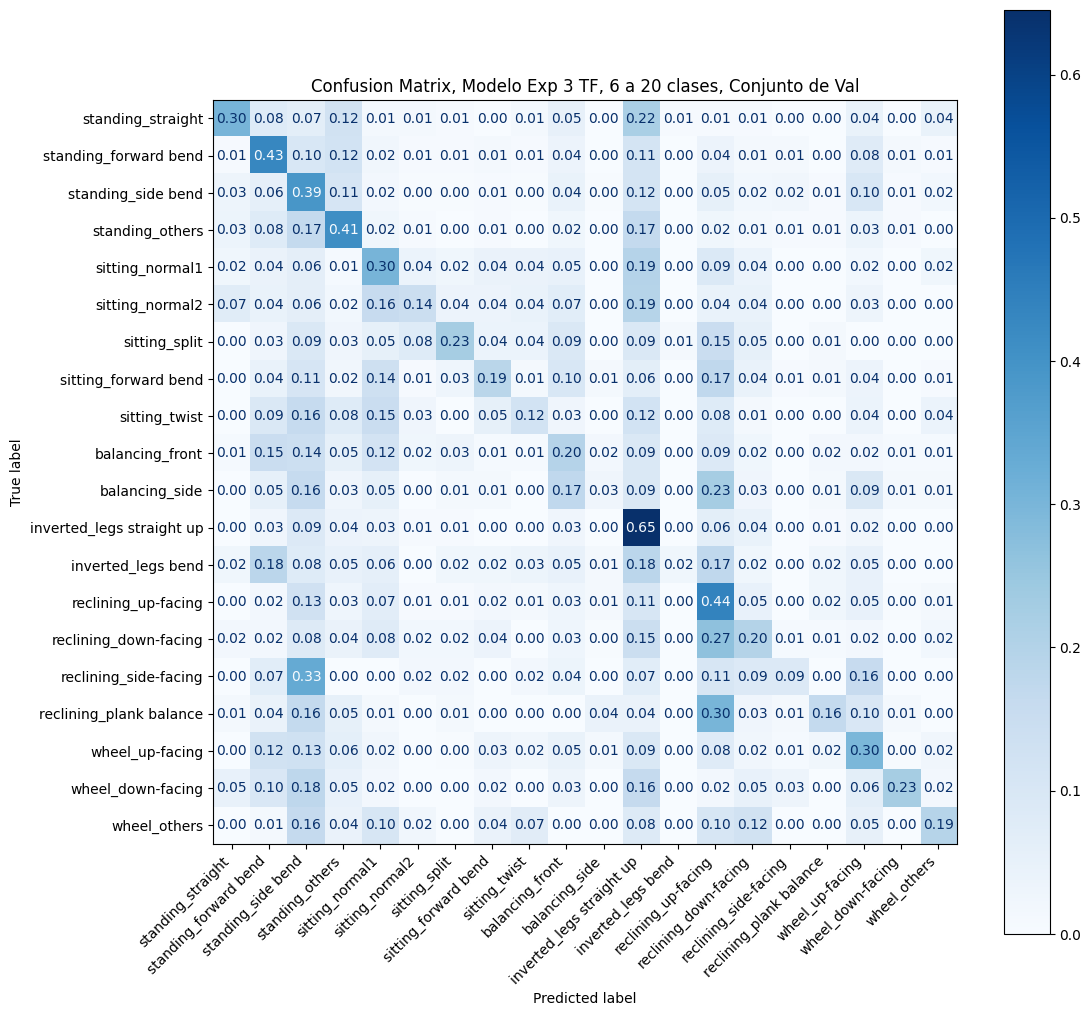

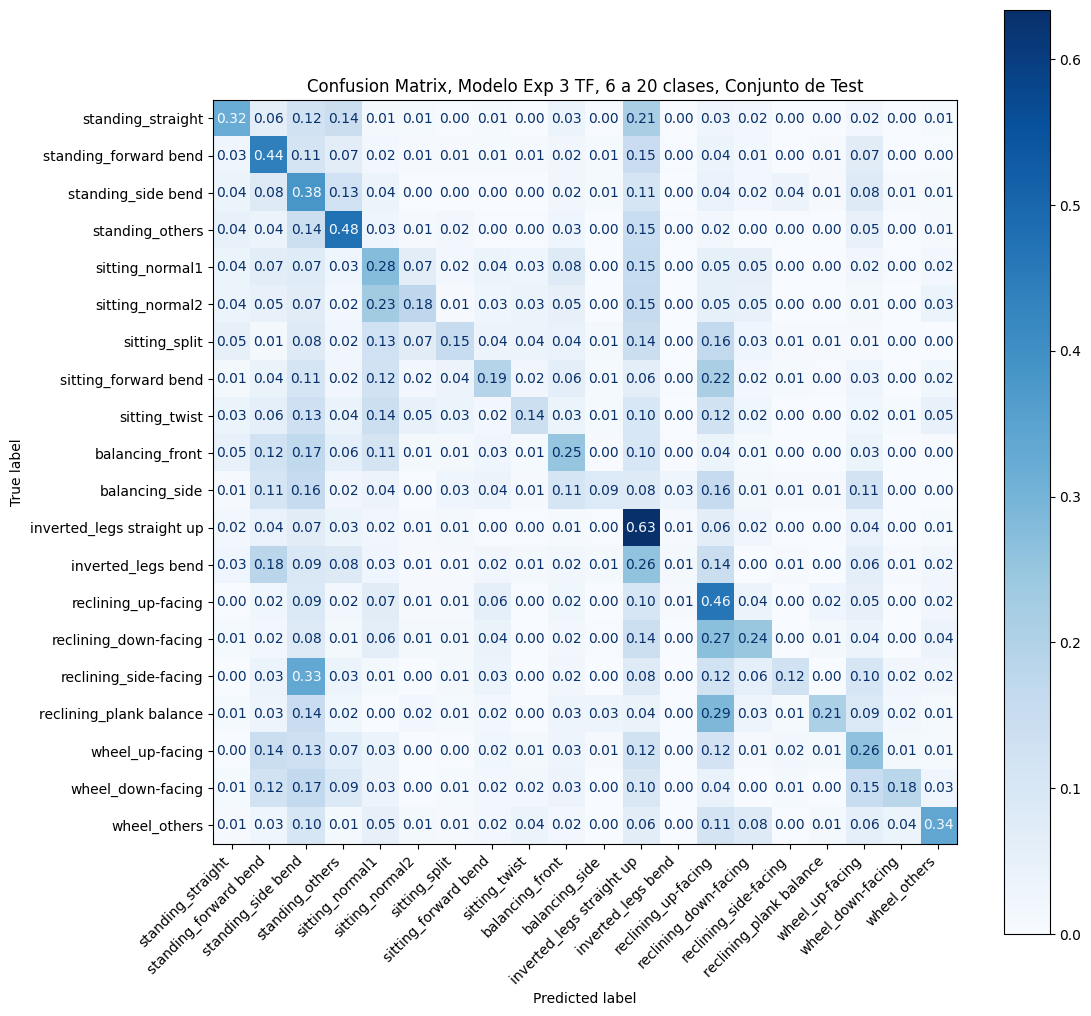

In [ ]:
ruta_eval = ruta_modelo_tf

lista_dataloaders = [train_loader,val_loader,test_loader]
graficar_metricas(list_dat=lista_dataloaders, ruta_mod=ruta_eval,
                  nombre_modelo='Exp 3 TF, 6 a 20 clases',lista_clases=label_names_20)

## TF 20-82

In [ ]:
clases_orig_2=clases_tf #6
model_tf_2 = ViT((3, 224, 224), n_patches=14, n_blocks=12, \
              hidden_d=768, n_heads=12, out_d=clases_orig_2)
network_state_dict = torch.load(ruta_modelo_tf)
model_tf_2.load_state_dict(network_state_dict)
model_tf_2 = model_tf_2.to(device)

optimizer_tf_2 =Adam(model_tf_2.parameters(), lr=LR)
optimizer_state_dict=torch.load(ruta_opt_tf)
optimizer_tf.load_state_dict(optimizer_state_dict)

In [ ]:
clases_tf_2=82
model_tf_2.mlp[2]= nn.Linear(768, clases_tf_2)
model_tf_2 = model_tf_2.to(device)

In [ ]:
summary(model_tf_2,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1             [-1, 196, 768]         590,592
         LayerNorm-2             [-1, 197, 768]           1,536
            Linear-3             [-1, 197, 768]         590,592
            Linear-4             [-1, 197, 768]         590,592
            Linear-5             [-1, 197, 768]         590,592
           Dropout-6         [-1, 12, 197, 197]               0
            Linear-7             [-1, 197, 768]         590,592
MultiHeadAttention-8             [-1, 197, 768]               0
           Dropout-9             [-1, 197, 768]               0
      ResidualAdd-10             [-1, 197, 768]               0
        LayerNorm-11             [-1, 197, 768]           1,536
           Linear-12            [-1, 197, 3072]       2,362,368
             GELU-13            [-1, 197, 3072]               0
          Dropout-14            [-1, 19

In [ ]:
clases=clases_tf_2
# Crear una instancia de la clase Lector con los datos cargados

dataset_train = Lector(data=df_train, modo=clases, ruta_images=path_ruta_images, transform=transform_train)
dataset_val = Lector(data=df_val, modo=clases, ruta_images=path_ruta_images, transform=transform_val_test)
dataset_test = Lector(data=df_test, modo=clases, ruta_images=path_ruta_images, transform=transform_val_test)
# Crear un DataLoader para el conjunto de entrenamiento
batch_size_n = 32  # ajusta según sea necesario #800
train_loader  = DataLoader(dataset_train, batch_size=batch_size_n, shuffle=True)
val_loader = DataLoader(dataset_val, batch_size=batch_size_n, shuffle=False)
test_loader = DataLoader(dataset_test, batch_size=batch_size_n, shuffle=False)

Epoch 1 in training:   0%|          | 0/376 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(

Epoch 1 in training: 100%|██████████| 376/376 [11:10<00:00,  1.57s/it]
                                                                      

Train accuracy: 13.08%
Epoch 1/5 loss: 3.64



Training:  20%|██        | 1/5 [13:45<55:02, 825.67s/it]

Val loss: 3.56
Val accuracy: 15.53%



Epoch 2 in training: 100%|██████████| 376/376 [10:59<00:00,  1.69s/it]
                                                                      

Train accuracy: 18.88%
Epoch 2/5 loss: 3.29



Training:  40%|████      | 2/5 [27:17<40:53, 817.70s/it]

Val loss: 3.42
Val accuracy: 18.68%



Epoch 3 in training: 100%|██████████| 376/376 [11:01<00:00,  1.74s/it]
                                                                      

Train accuracy: 22.91%
Epoch 3/5 loss: 3.11



Training:  60%|██████    | 3/5 [40:51<27:12, 816.05s/it]

Val loss: 3.37
Val accuracy: 19.05%



Epoch 4 in training: 100%|██████████| 376/376 [11:00<00:00,  1.68s/it]
                                                                      

Train accuracy: 25.65%
Epoch 4/5 loss: 2.97



Training:  80%|████████  | 4/5 [54:26<13:35, 815.45s/it]

Val loss: 3.31
Val accuracy: 21.08%



Epoch 5 in training: 100%|██████████| 376/376 [11:07<00:00,  1.57s/it]
                                                                      

Train accuracy: 28.17%
Epoch 5/5 loss: 2.83



Training: 100%|██████████| 5/5 [1:08:08<00:00, 817.61s/it]


Val loss: 3.27
Val accuracy: 21.68%


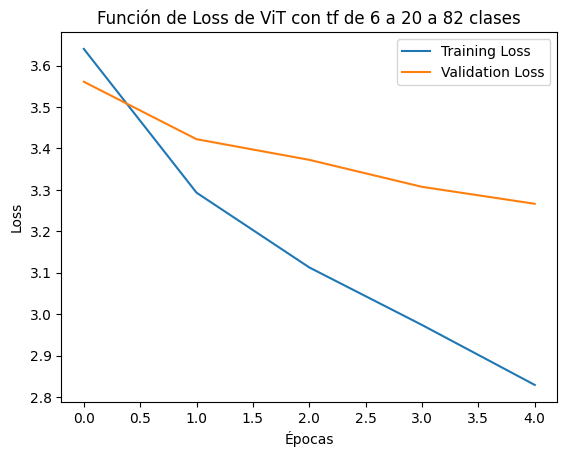

In [ ]:
loss_train_history=[]
loss_val_history=[]
# Training loop
optimizer = optimizer_tf_2
criterion = CrossEntropyLoss()


ruta_modelo_tf_2 = '/content/drive/MyDrive/exp_3_chk_6_tf_20_tf_82.pth'
ruta_opt_tf_2 = '/content/drive/MyDrive/exp_3_optimizer_6_tf_20_tf_82.pth'
titulo_grafico = f'Función de Loss de ViT con tf de {clases_orig} a {clases_tf} a {clases_tf_2} clases'

train_funcion(red=model_tf_2,criterio=criterion,optimizador=optimizer,ruta_guardado_red=ruta_modelo_tf_2,
              ruta_guardado_optimizer=ruta_opt_tf_2, dataloader_train = train_loader,
              dataloader_val = val_loader ,titulo_grafico_loss = titulo_grafico,
              n_epoch = N_EPOCHS )


### Evaluación TF 20-82

Metricas modelo : Exp 3 TF, 6 a 20 a 82 clases, Conjunto de Train


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                                           precision    recall  f1-score   support

                                                       Akarna_Dhanurasana     0.0000    0.0000    0.0000        52
                             Bharadvaja's_Twist_pose_or_Bharadvajasana_I_     0.3300    0.6098    0.4283       164
                                         Boat_Pose_or_Paripurna_Navasana_     0.4895    0.4604    0.4745       202
                                     Bound_Angle_Pose_or_Baddha_Konasana_     0.3889    0.1818    0.2478       154
                                                 Bow_Pose_or_Dhanurasana_     0.3846    0.1364    0.2013       110
                                 Bridge_Pose_or_Setu_Bandha_Sarvangasana_     0.3015    0.5899    0.3990       139
                                                 Camel_Pose_or_Ustrasana_     0.2712    0.1509    0.1939       106
                                            Cat_Cow_Pose_or_Marjaryasana_     0

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


Metricas modelo : Exp 3 TF, 6 a 20 a 82 clases, Conjunto de Val
                                                                           precision    recall  f1-score   support

                                                       Akarna_Dhanurasana     0.0000    0.0000    0.0000        13
                             Bharadvaja's_Twist_pose_or_Bharadvajasana_I_     0.2907    0.6098    0.3937        41
                                         Boat_Pose_or_Paripurna_Navasana_     0.2600    0.2549    0.2574        51
                                     Bound_Angle_Pose_or_Baddha_Konasana_     0.2353    0.1026    0.1429        39
                                                 Bow_Pose_or_Dhanurasana_     0.0909    0.0370    0.0526        27
                                 Bridge_Pose_or_Setu_Bandha_Sarvangasana_     0.2812    0.5143    0.3636        35
                                                 Camel_Pose_or_Ustrasana_     0.0000    0.0000    0.0000        27
               

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/f

Metricas modelo : Exp 3 TF, 6 a 20 a 82 clases, Conjunto de Test
                                                                           precision    recall  f1-score   support

                                                       Akarna_Dhanurasana     0.0000    0.0000    0.0000        20
                             Bharadvaja's_Twist_pose_or_Bharadvajasana_I_     0.2642    0.4941    0.3443        85
                                         Boat_Pose_or_Paripurna_Navasana_     0.3289    0.2907    0.3086        86
                                     Bound_Angle_Pose_or_Baddha_Konasana_     0.4167    0.1786    0.2500        56
                                                 Bow_Pose_or_Dhanurasana_     0.1875    0.0545    0.0845        55
                                 Bridge_Pose_or_Setu_Bandha_Sarvangasana_     0.2308    0.3443    0.2763        61
                                                 Camel_Pose_or_Ustrasana_     0.0417    0.0189    0.0260        53
              

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


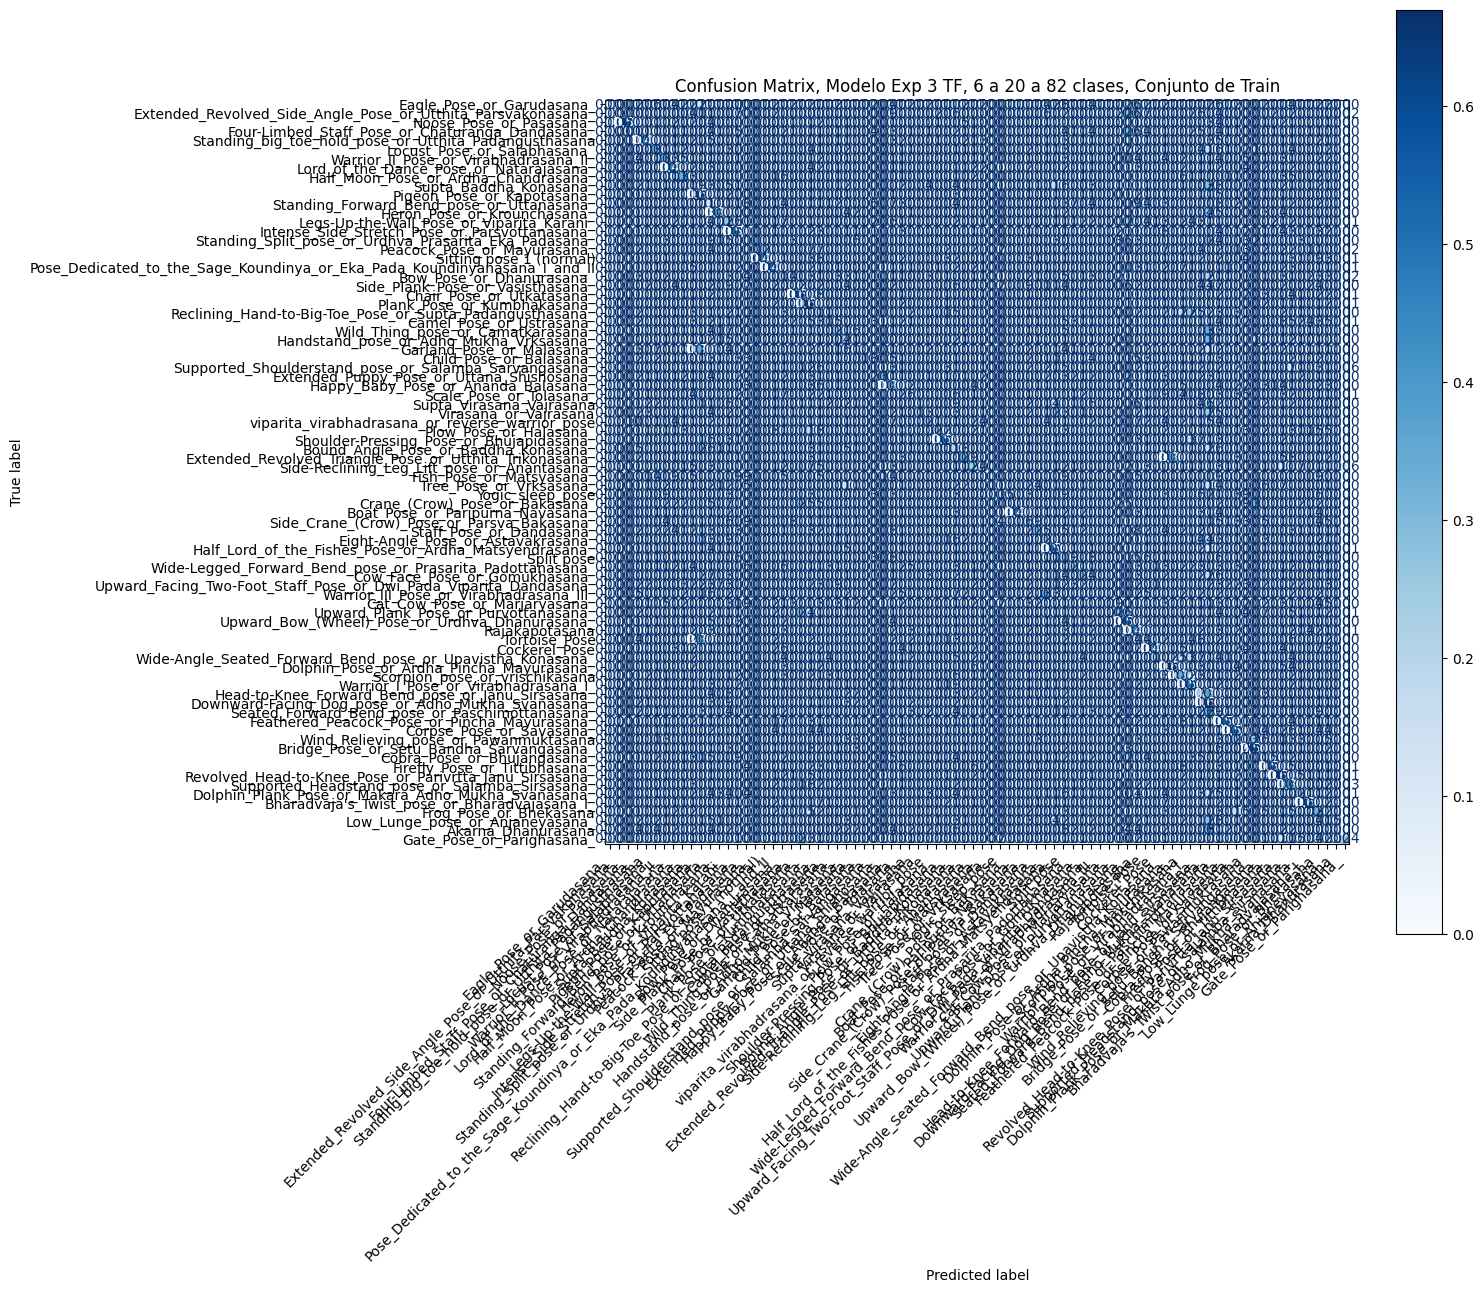

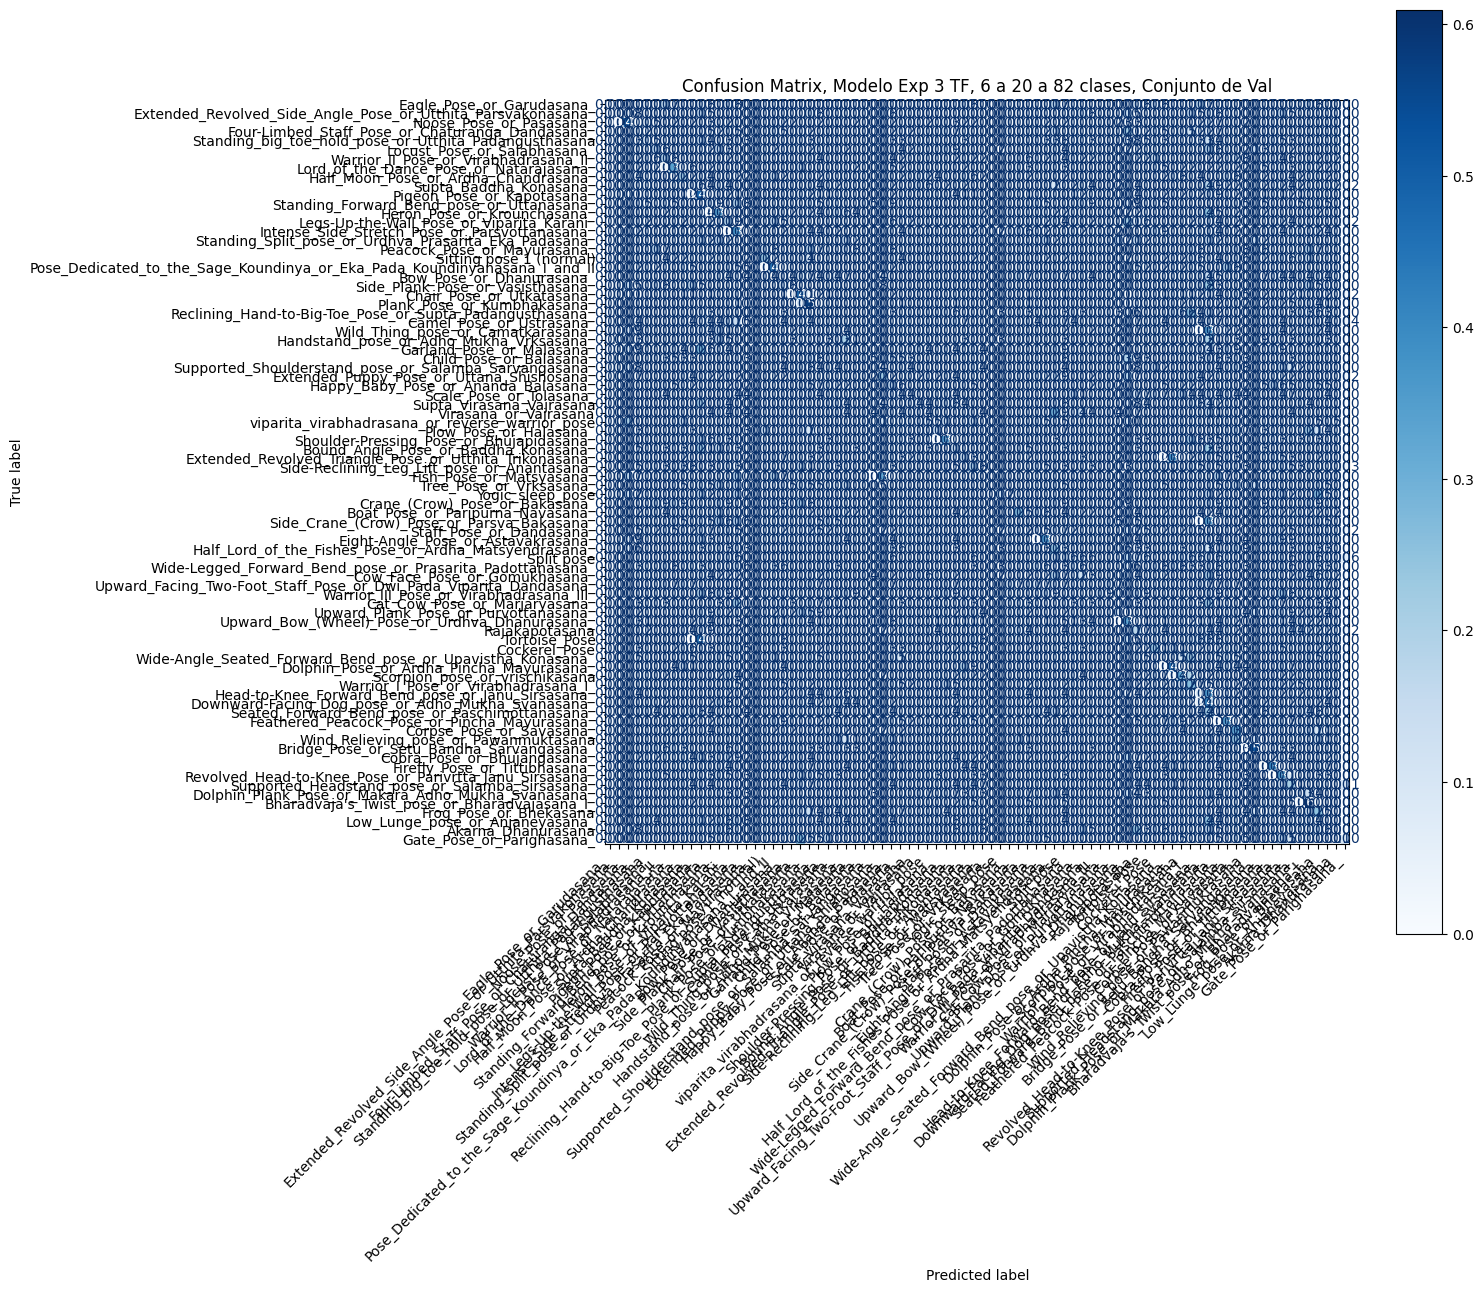

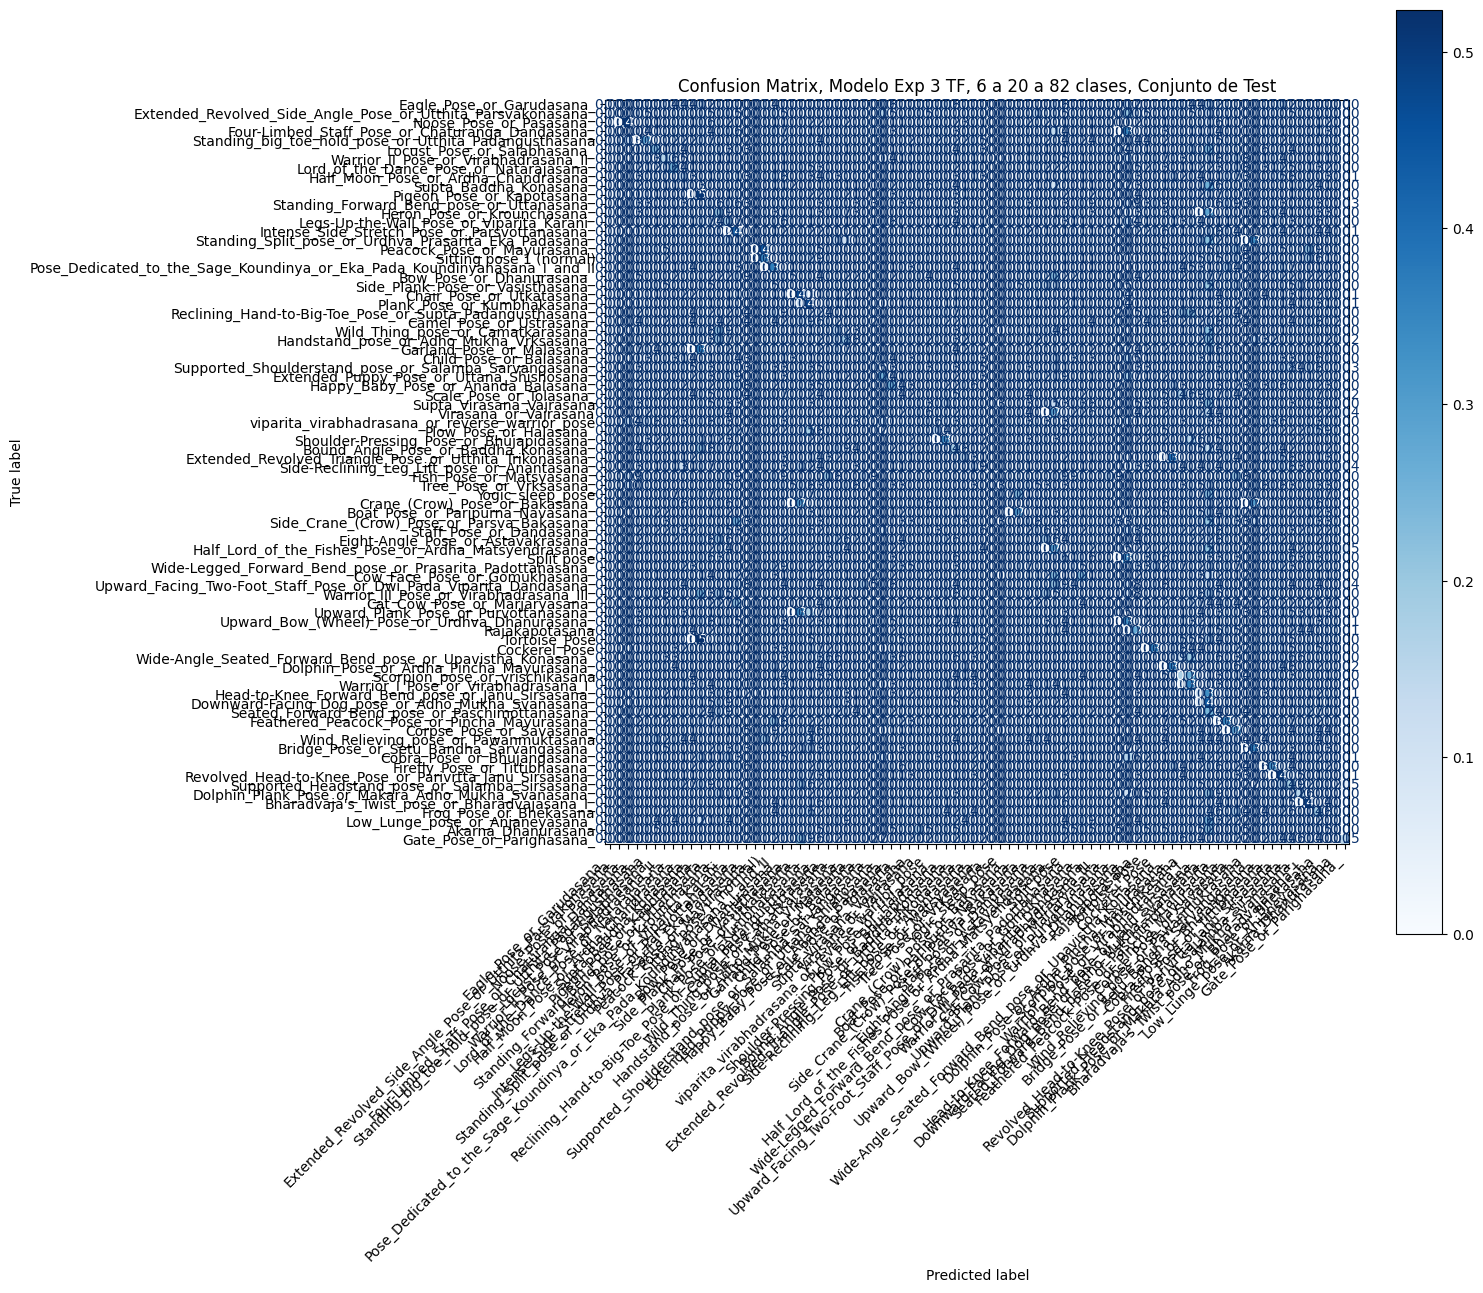

In [ ]:
ruta_eval = ruta_modelo_tf_2

lista_dataloaders = [train_loader,val_loader,test_loader]
graficar_metricas(list_dat=lista_dataloaders, ruta_mod=ruta_eval,
                  nombre_modelo='Exp 3 TF, 6 a 20 a 82 clases',lista_clases=label_names_82)

------------------------